In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
from time import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split



In [6]:
px = 410

In [7]:
rootdir = './custom_train/suit'
generator = ImageDataGenerator(rescale=1./255)
image_generator = generator.flow_from_directory(rootdir, target_size=(px,px), batch_size=659, class_mode='sparse')

Found 539 images belonging to 4 classes.


In [8]:
images, labels = image_generator.next()


In [9]:
images.shape

(539, 410, 410, 3)

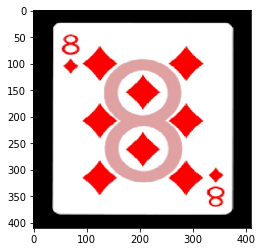

In [10]:
plt.imshow(images[1])

In [12]:
X_train = images
y_train = labels

In [13]:
y_train.shape

(539,)

In [14]:
LR = 0.01
BS = 380 #20
EPOCHS = 50


EarlyStop = EarlyStopping(monitor='val_loss',patience=10)
SaveBest = ModelCheckpoint('TheGamblerGauss.h5',save_best_only=True, verbose = 2)

In [15]:
model = Sequential()

model.add(Conv2D(8,(3,3),activation = 'relu', input_shape=(px,px,3)))
model.add(Conv2D(8,(3,3),activation = 'relu'))
model.add(Conv2D(16,(5,5),activation = 'relu'))
model.add(Conv2D(16,(5,5),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(5,5),activation = 'relu'))
model.add(Conv2D(16,(5,5),activation = 'relu'))
model.add(Conv2D(32,(7,7),activation = 'relu'))
model.add(Conv2D(32,(7,7),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(7,7),activation = 'relu'))
model.add(Conv2D(64,(7,7),activation = 'relu'))
model.add(Conv2D(64,(7,7),activation = 'relu'))
model.add(Conv2D(64,(7,7),activation = 'relu'))

model.add(Flatten())
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))




In [16]:
model.compile(optimizer=Adam(learning_rate=LR),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

TypeError: Unexpected keyword argument passed to optimizer: learning_rate

In [37]:
hist = model.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2,
                 callbacks=[SaveBest]
                )

Train on 431 samples, validate on 108 samples
Epoch 1/50
416/431 [===========================>..] - ETA: 5s - loss: 6289.2010 - accuracy: 0.2620 
Epoch 00001: val_loss improved from inf to 1.38648, saving model to TheGambler.h5
431/431 [==============================] - 184s 427ms/sample - loss: 6070.3685 - accuracy: 0.2599 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 2/50
416/431 [===========================>..] - ETA: 5s - loss: 10.4805 - accuracy: 0.2524 
Epoch 00002: val_loss did not improve from 1.38648
431/431 [==============================] - 165s 382ms/sample - loss: 10.1644 - accuracy: 0.2506 - val_loss: 1.3915 - val_accuracy: 0.2130
Epoch 3/50
416/431 [===========================>..] - ETA: 5s - loss: 1.3866 - accuracy: 0.2668 
Epoch 00003: val_loss did not improve from 1.38648
431/431 [==============================] - 165s 382ms/sample - loss: 1.3860 - accuracy: 0.2715 - val_loss: 1.3918 - val_accuracy: 0.2130
Epoch 4/50
416/431 [===========================>..] - ETA: 5